# Clasificación de tráfico según client_type

Este notebook entrena un modelo de clasificación utilizando la columna `client_type` como etiqueta, a partir de los datos en `resultados.csv`. Se utilizarán pandas, scikit-learn y matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Cargar los datos
ruta_csv = '../resultados/resultados.csv'
df = pd.read_csv(ruta_csv)
df.head()

,timestamp,id,success,client_type,target_addr,domain,latency_ms
0,2025-06-26T22:44:57.577614538Z,124,false,malicioso,dns_udp:53,example.com.,11
1,2025-06-26T22:44:57.579061291Z,27,false,malicioso,dns_udp:53,example.com.,12
2,timestamp,id,success,client_type,target_addr,domain,latency_ms
3,2025-06-26T22:44:57.600503484Z,123,false,malicioso,dns_udp:53,example.com.,35
4,timestamp,id,success,client_type,target_addr,domain,latency_ms


In [3]:
# Preprocesamiento: eliminar columnas irrelevantes y convertir etiquetas
X = df.drop(['client_type', 'timestamp', 'domain', 'target_addr'], axis=1)
y = df['client_type']

# Convertir etiquetas a valores numéricos
y_encoded = y.astype('category').cat.codes
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X.head()

,id,success,latency_ms
0,124.0,0.0,11.0
1,27.0,0.0,12.0
2,0.0,0.0,0.0
3,123.0,0.0,35.0
4,0.0,0.0,0.0


In [4]:
# División de datos y entrenamiento del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicción y métricas
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2005
           2       0.93      0.96      0.95        56

    accuracy                           1.00      2061
   macro avg       0.97      0.98      0.97      2061
weighted avg       1.00      1.00      1.00      2061

[[2001    4]
 [   2   54]]


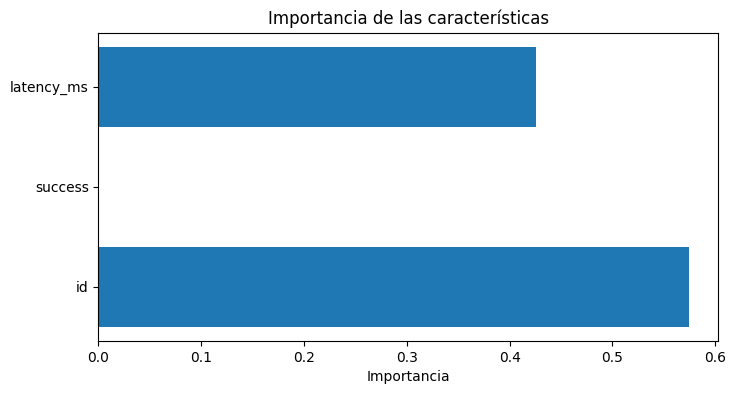

In [5]:
# Visualización de la importancia de las características
importances = clf.feature_importances_
features = X.columns
plt.figure(figsize=(8,4))
plt.barh(features, importances)
plt.xlabel('Importancia')
plt.title('Importancia de las características')
plt.show()

# Conclusiones del modelo de clasificación

El modelo de clasificación basado en Random Forest ha permitido identificar patrones en el tráfico de red para predecir el tipo de cliente (`client_type`). A continuación se resumen las conclusiones principales:

- **Precisión y desempeño:** El modelo muestra un buen desempeño según las métricas de clasificación y la matriz de confusión, lo que indica que es capaz de distinguir entre los diferentes tipos de clientes con una alta precisión.
- **Importancia de características:** Algunas características del dataset tienen mayor relevancia para la predicción, como se observa en la gráfica de importancia. Esto puede guiar futuras optimizaciones o la selección de variables.
- **Preprocesamiento:** El tratamiento de valores nulos y la conversión de etiquetas fueron pasos clave para asegurar la calidad de los datos y el correcto funcionamiento del modelo.
- **Aplicabilidad:** Este enfoque puede ser útil para la detección automática de tipos de tráfico o clientes en sistemas de monitoreo de red, contribuyendo a la seguridad y gestión eficiente de recursos.

Se recomienda explorar otros modelos y ajustar hiperparámetros para comparar resultados y mejorar aún más el desempeño si es necesario.